# Assignment-04-Simple Linear Regression-2

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [6]:
dataset=pd.read_csv('C:/Users/Payod/Downloads/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [7]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


### Plotting Data

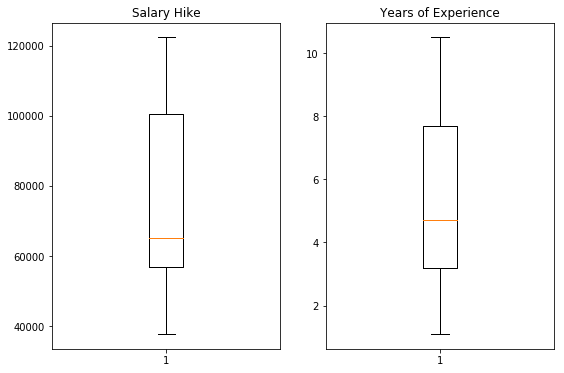

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(dataset['YearsExperience'])
plt.title('Years of Experience')
plt.show()

# Feature Engineering 

C:\Users\Payod\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


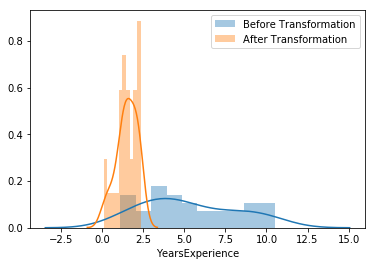

In [10]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(dataset['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\Payod\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


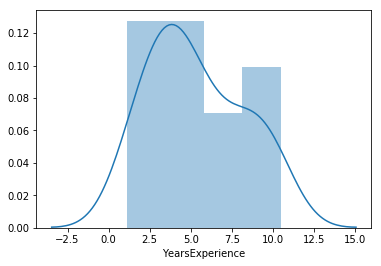

In [5]:
sns.distplot(dataset['YearsExperience'])

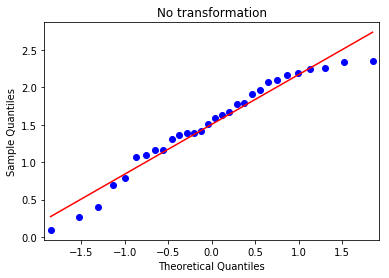

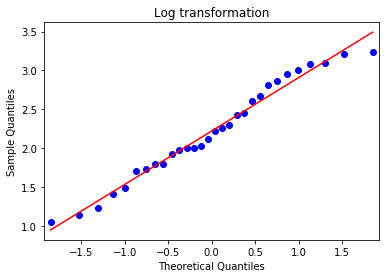

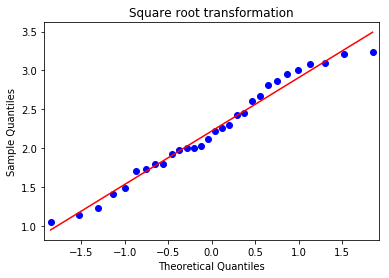

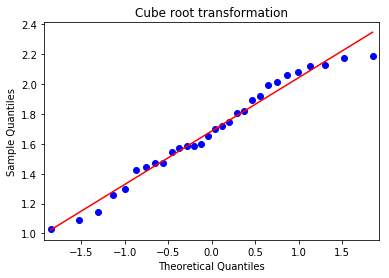

In [11]:
smf.qqplot(np.log(dataset['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(dataset['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

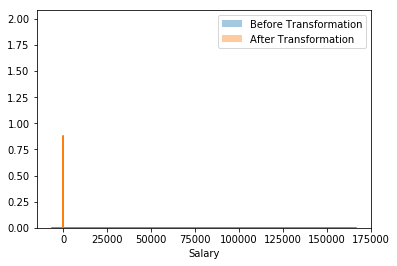

In [12]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Salary'], bins = 10, kde = True)
sns.distplot(np.log(dataset['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

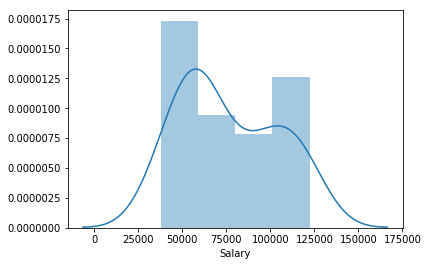

In [6]:
sns.distplot(dataset['Salary'])

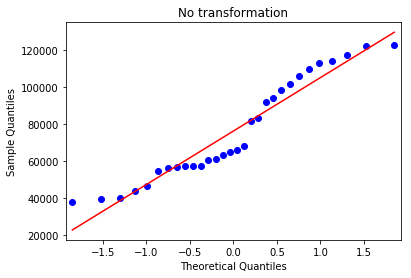

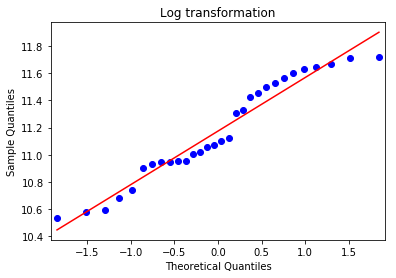

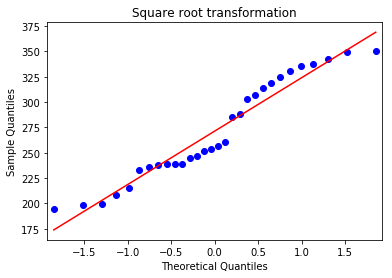

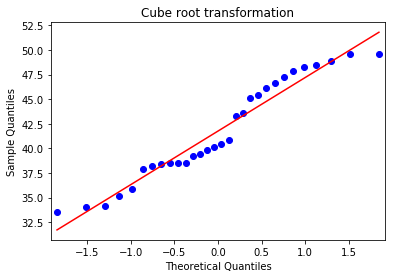

In [13]:
smf.qqplot(dataset['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

###### Correlation Analysis

In [6]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


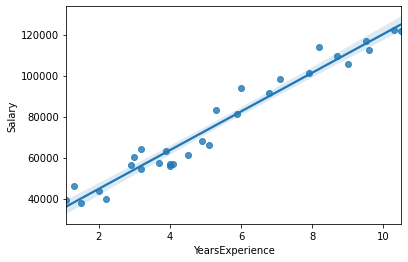

In [7]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

###### Model Building

In [8]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

###### Model Testing

In [9]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [10]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [11]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

###### Model Predictions

In [13]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [15]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [18]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Transformations

### OLS Model

In [19]:
model = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           7.40e-16
Time:                        10:47:56   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           7.58e-19
Time:                        10:47:05   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           6.37e-18
Time:                        10:47:05   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""